### TODO
- trouver le meilleur model en local
- analyse des features importances / SHAP
- celles qui ont le moins d'interet -> drop : 'Range F 14', 'target_shift', 'mean_time1'
- en choisir qqunes (5) pour faire des sliding windows

- **Faire du feature engineering comme sur les predictions de feu**
    - mean_time
    - lag
    - dayofweek,...

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

In [3]:
from problem import get_train_data

data_train, labels_train = get_train_data()

In [4]:
from problem import get_test_data

data_test, labels_test = get_test_data()

In [5]:
df = data_train.copy()
df['target'] = labels_train

In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [9]:
import pandas as pd
import pmdarima as pm

# Load your data into a pandas dataframe
#df = pd.read_csv('your_data.csv')

# Find the optimal values for p, d, and q using auto_arima
model = pm.auto_arima(df['Beta'], seasonal=True, suppress_warnings=True)
p, d, q = model.order

KeyboardInterrupt: 

In [134]:
# Fit the ARIMA model to the time series data
model = ARIMA(df.drop(columns=['target'], axis=1), order=(p,d,q))
model_fit = model.fit()
'''
# Use the residuals from the ARIMA model as features for classification
features = model_fit.resid
labels = df['label_column']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# Train the Adaboost classifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)'''

NameError: name 'p' is not defined

#### Creation d'une feature qui le nombre de jour d'affilé ou il y a sun wind ou sun storm

In [83]:
count = 1
df['mean_time'] = 0

for i in tqdm(range(df.shape[0])):
    if df['target'].iloc[i] == df['target'].iloc[i-1] and i!=0:
        # Incrémente le décompte
        count += 1
        # Affecte le décompte à la colonne 'mean_time'
        df['mean_time'].iloc[i] = count
    else:
        # Réinitialise le décompte
        count = 1
        df['mean_time'].iloc[i] = count


  0%|          | 0/509834 [00:00<?, ?it/s]/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 509834/509834 [04:51<00:00, 1751.63it/s]


#### Rolling windows



In [94]:
24*7

168

In [104]:
df['Beta_rw2h_std'] = df['Beta'].rolling('2h', center=False).std().ffill().bfill().astype(df['Beta'].dtype)
df['Beta_rw1h_std'] = df['Beta'].rolling('1h', center=False).std().ffill().bfill().astype(df['Beta'].dtype)
df['Beta_rw24h_std'] = df['Beta'].rolling('24h', center=False).std().ffill().bfill().astype(df['Beta'].dtype)
df['Beta_rw1w_std'] = df['Beta'].rolling('168h', center=False).std().ffill().bfill().astype(df['Beta'].dtype)
df['Beta_rw12h_std'] = df['Beta'].rolling('12h', center=False).std().ffill().bfill().astype(df['Beta'].dtype)

In [105]:
df['Beta_rw2h_mean'] = df['Beta'].rolling('2h', center=False).mean().ffill().bfill().astype(df['Beta'].dtype)
df['Beta_rw1h_mean'] = df['Beta'].rolling('1h', center=False).mean().ffill().bfill().astype(df['Beta'].dtype)
df['Beta_rw24h_mean'] = df['Beta'].rolling('24h', center=False).mean().ffill().bfill().astype(df['Beta'].dtype)
df['Beta_rw1w_mean'] = df['Beta'].rolling('168h', center=False).mean().ffill().bfill().astype(df['Beta'].dtype)
df['Beta_rw12h_mean'] = df['Beta'].rolling('12h', center=False).mean().ffill().bfill().astype(df['Beta'].dtype)

In [106]:
df['RmsBob_rw2h_std'] = df['RmsBob'].rolling('2h', center=False).std().ffill().bfill().astype(df['RmsBob'].dtype)
df['RmsBob_rw1h_std'] = df['RmsBob'].rolling('1h', center=False).std().ffill().bfill().astype(df['RmsBob'].dtype)
df['RmsBob_rw24h_std'] = df['RmsBob'].rolling('24h', center=False).std().ffill().bfill().astype(df['RmsBob'].dtype)
df['RmsBob_rw1w_std'] = df['RmsBob'].rolling('168h', center=False).std().ffill().bfill().astype(df['RmsBob'].dtype)
df['RmsBob_rw12h_std'] = df['RmsBob'].rolling('12h', center=False).std().ffill().bfill().astype(df['RmsBob'].dtype)

In [107]:
df['RmsBob_rw2h_mean'] = df['RmsBob'].rolling('2h', center=False).mean().ffill().bfill().astype(df['RmsBob'].dtype)
df['RmsBob_rw1h_mean'] = df['RmsBob'].rolling('1h', center=False).mean().ffill().bfill().astype(df['RmsBob'].dtype)
df['RmsBob_rw24h_mean'] = df['RmsBob'].rolling('24h', center=False).mean().ffill().bfill().astype(df['RmsBob'].dtype)
df['RmsBob_rw1w_mean'] = df['RmsBob'].rolling('168h', center=False).mean().ffill().bfill().astype(df['RmsBob'].dtype)
df['RmsBob_rw12h_mean'] = df['RmsBob'].rolling('12h', center=False).mean().ffill().bfill().astype(df['RmsBob'].dtype)

In [108]:
df['B_rw2h_std'] = df['B'].rolling('2h', center=False).std().ffill().bfill().astype(df['B'].dtype)
df['B_rw1h_std'] = df['B'].rolling('1h', center=False).std().ffill().bfill().astype(df['B'].dtype)
df['B_rw24h_std'] = df['B'].rolling('24h', center=False).std().ffill().bfill().astype(df['B'].dtype)
df['B_rw1w_std'] = df['B'].rolling('168h', center=False).std().ffill().bfill().astype(df['B'].dtype)
df['B_rw12h_std'] = df['B'].rolling('12h', center=False).std().ffill().bfill().astype(df['B'].dtype)

In [109]:
df['B_rw2h_mean'] = df['B'].rolling('2h', center=False).mean().ffill().bfill().astype(df['B'].dtype)
df['B_rw1h_mean'] = df['B'].rolling('1h', center=False).mean().ffill().bfill().astype(df['B'].dtype)
df['B_rw24h_mean'] = df['B'].rolling('24h', center=False).mean().ffill().bfill().astype(df['B'].dtype)
df['B_rw1w_mean'] = df['B'].rolling('168h', center=False).mean().ffill().bfill().astype(df['B'].dtype)
df['B_rw12h_mean'] = df['B'].rolling('12h', center=False).mean().ffill().bfill().astype(df['B'].dtype)

In [110]:
df['Range F 7_rw2h_std'] = df['Range F 7'].rolling('2h', center=False).std().ffill().bfill().astype(df['Range F 7'].dtype)
df['Range F 7_rw1h_std'] = df['Range F 7'].rolling('1h', center=False).std().ffill().bfill().astype(df['Range F 7'].dtype)
df['Range F 7_rw24h_std'] = df['Range F 7'].rolling('24h', center=False).std().ffill().bfill().astype(df['Range F 7'].dtype)
df['Range F 7_rw1w_std'] = df['Range F 7'].rolling('168h', center=False).std().ffill().bfill().astype(df['Range F 7'].dtype)
df['Range F 7_rw12h_std'] = df['Range F 7'].rolling('12h', center=False).std().ffill().bfill().astype(df['Range F 7'].dtype)

In [111]:
df['Range F 7_rw2h_mean'] = df['Range F 7'].rolling('2h', center=False).mean().ffill().bfill().astype(df['Range F 7'].dtype)
df['Range F 7_rw1h_mean'] = df['Range F 7'].rolling('1h', center=False).mean().ffill().bfill().astype(df['Range F 7'].dtype)
df['Range F 7_rw24h_mean'] = df['Range F 7'].rolling('24h', center=False).mean().ffill().bfill().astype(df['Range F 7'].dtype)
df['Range F 7_rw1w_mean'] = df['Range F 7'].rolling('168h', center=False).mean().ffill().bfill().astype(df['Range F 7'].dtype)
df['Range F 7_rw12h_mean'] = df['Range F 7'].rolling('12h', center=False).mean().ffill().bfill().astype(df['Range F 7'].dtype)

In [112]:
df['Vth_rw2h_std'] = df['Vth'].rolling('2h', center=False).std().ffill().bfill().astype(df['Vth'].dtype)
df['Vth_rw1h_std'] = df['Vth'].rolling('1h', center=False).std().ffill().bfill().astype(df['Vth'].dtype)
df['Vth_rw24h_std'] = df['Vth'].rolling('24h', center=False).std().ffill().bfill().astype(df['Vth'].dtype)
df['Vth_rw1w_std'] = df['Vth'].rolling('168h', center=False).std().ffill().bfill().astype(df['Vth'].dtype)
df['Vth_rw12h_std'] = df['Vth'].rolling('12h', center=False).std().ffill().bfill().astype(df['Vth'].dtype)

In [113]:
df['Vth_rw2h_mean'] = df['Vth'].rolling('2h', center=False).mean().ffill().bfill().astype(df['Vth'].dtype)
df['Vth_rw1h_mean'] = df['Vth'].rolling('1h', center=False).mean().ffill().bfill().astype(df['Vth'].dtype)
df['Vth_rw24h_mean'] = df['Vth'].rolling('24h', center=False).mean().ffill().bfill().astype(df['Vth'].dtype)
df['Vth_rw1w_mean'] = df['Vth'].rolling('168h', center=False).mean().ffill().bfill().astype(df['Vth'].dtype)
df['Vth_rw12h_mean'] = df['Vth'].rolling('12h', center=False).mean().ffill().bfill().astype(df['Vth'].dtype)

In [114]:
df.shape

(509834, 84)

In [115]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

# Séparer les données en X et y
X = df.drop(columns=['target'], axis=1)
y = df['target']
X2 = X.fillna(0)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tqdm(tscv.split(X2)):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    classifier = RandomForestClassifier(max_depth=100, random_state=42)#LogisticRegression()
    model =make_pipeline(StandardScaler(), classifier)

    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0it [00:00, ?it/s]

0.8898813726874735


1it [02:11, 131.17s/it]

0.2618844122619449
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     71206
           1       0.83      0.40      0.54     13766

    accuracy                           0.89     84972
   macro avg       0.86      0.69      0.74     84972
weighted avg       0.88      0.89      0.87     84972

The balanced accuracy of the default model is 0.694
0.877418443722638


2it [07:05, 227.43s/it]

0.31589708457298943
              precision    recall  f1-score   support

           0       0.89      0.96      0.93     69883
           1       0.74      0.48      0.58     15089

    accuracy                           0.88     84972
   macro avg       0.82      0.72      0.75     84972
weighted avg       0.87      0.88      0.87     84972

The balanced accuracy of the default model is 0.720
0.9361907451866497


3it [15:01, 340.85s/it]

0.18013674462366858
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     77546
           1       0.80      0.36      0.50      7426

    accuracy                           0.94     84972
   macro avg       0.87      0.68      0.73     84972
weighted avg       0.93      0.94      0.93     84972

The balanced accuracy of the default model is 0.677
0.9517605799557501


4it [25:49, 461.99s/it]

0.14380137808633117
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     77756
           1       0.77      0.62      0.69      7216

    accuracy                           0.95     84972
   macro avg       0.87      0.80      0.83     84972
weighted avg       0.95      0.95      0.95     84972

The balanced accuracy of the default model is 0.803
0.9738737466459539


5it [40:09, 481.95s/it]

0.11936922470993104
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     81981
           1       0.77      0.37      0.50      2991

    accuracy                           0.97     84972
   macro avg       0.87      0.68      0.74     84972
weighted avg       0.97      0.97      0.97     84972

The balanced accuracy of the default model is 0.682


In [116]:
def rf_features_importance(model, cols):
    '''
    Plot feature_importance from a random forest model

    Input:
    model (MODEL_TYPE) : Model for which to compute the feature importance
    cols (list) : input DataFrame with true labels

    Output:
    None
    '''
    # get feature importance from model
    importances = model.feature_importances_
    forest_importances = pd.Series(importances, index=cols).sort_values(ascending=False)
    # plot results
    fig, ax = plt.subplots(figsize=(12, 5))
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances")
    fig.tight_layout()

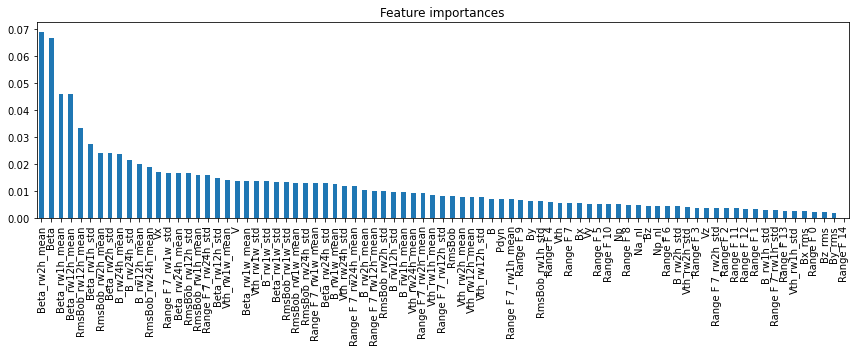

In [117]:
rf_features_importance(classifier, cols=X_train.columns)

In [125]:
pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)[pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)>0.015]

Beta_rw2h_mean         0.069018
Beta                   0.066832
Beta_rw1h_mean         0.046148
Beta_rw12h_mean        0.046101
RmsBob_rw12h_mean      0.033461
Beta_rw1h_std          0.027540
RmsBob_rw2h_mean       0.024300
Beta_rw2h_std          0.024114
B_rw24h_mean           0.023601
B_rw24h_std            0.021652
B_rw12h_mean           0.020005
RmsBob_rw24h_mean      0.018795
Vx                     0.017172
Range F 7_rw1w_std     0.016833
Beta_rw24h_mean        0.016738
RmsBob_rw12h_std       0.016547
RmsBob_rw1h_mean       0.016018
Range F 7_rw24h_std    0.015897
dtype: float64

#### Seasonal Differencing



In [29]:
df['Beta_diff'] = df['Beta'].diff(periods=144)
df['Vx_diff'] = df['Vx'].diff(periods=144)
df['Range F 4_diff'] = df['Range F 4'].diff(periods=144)
df['RmsBob_diff'] = df['RmsBob'].diff(periods=144)
df['Range F 1_diff'] = df['Range F 1'].diff(periods=144)

In [30]:
data_test['Beta_diff'] = data_test['Beta'].diff(periods=144)
data_test['Vx_diff'] = data_test['Vx'].diff(periods=144)
data_test['Range F 4_diff'] = data_test['Range F 4'].diff(periods=144)
data_test['RmsBob_diff'] = data_test['RmsBob'].diff(periods=144)
data_test['Range F 1_diff'] = data_test['Range F 1'].diff(periods=144)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
y = df['target']
X = df.drop(columns=['target'], axis=1)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    #model.set_params(class_weight='balanced')
    classifier = HistGradientBoostingClassifier()
    model = make_pipeline(StandardScaler(), classifier)


    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8865744009791461
0.28146448261289164
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     71206
           1       0.70      0.52      0.60     13766

    accuracy                           0.89     84972
   macro avg       0.81      0.74      0.77     84972
weighted avg       0.88      0.89      0.88     84972

The balanced accuracy of the default model is 0.740
0.863143153038648
0.33979731276440056
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     69883
           1       0.67      0.45      0.54     15089

    accuracy                           0.86     84972
   macro avg       0.78      0.70      0.73     84972
weighted avg       0.85      0.86      0.85     84972

The balanced accuracy of the default model is 0.701
0.9293296615355646
0.18445978520651965
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1     

#### Creation de lag features

In [31]:
df['Beta_d-1'] = df['Beta'].shift(144)
df['Beta_y-1'] = df['Beta'].shift(144*365)
df['Beta_m-1'] = df['Beta'].shift(144*30)
df['Beta_t-1'] = df['Beta'].shift(1)

In [32]:
data_test['Beta_d-1'] = data_test['Beta'].shift(144)
data_test['Beta_y-1'] = data_test['Beta'].shift(144*365)
data_test['Beta_m-1'] = data_test['Beta'].shift(144*30)
data_test['Beta_t-1'] = data_test['Beta'].shift(1)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
df = df.fillna(0)
y = df['target']
X = df.drop(columns=['target'], axis=1)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    #model.set_params(class_weight='balanced')
    classifier = HistGradientBoostingClassifier()
    model = make_pipeline(StandardScaler(), classifier)


    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8858800546062232
0.313331402723285
              precision    recall  f1-score   support

           0       0.89      0.98      0.94     71206
           1       0.81      0.39      0.53     13766

    accuracy                           0.89     84972
   macro avg       0.85      0.69      0.73     84972
weighted avg       0.88      0.89      0.87     84972

The balanced accuracy of the default model is 0.686
0.8624841124135009
0.3459077275248097
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     69883
           1       0.69      0.42      0.52     15089

    accuracy                           0.86     84972
   macro avg       0.78      0.69      0.72     84972
weighted avg       0.85      0.86      0.85     84972

The balanced accuracy of the default model is 0.688
0.93157746081062
0.18128389007582424
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1       0.

In [11]:
df.shape

(509834, 43)

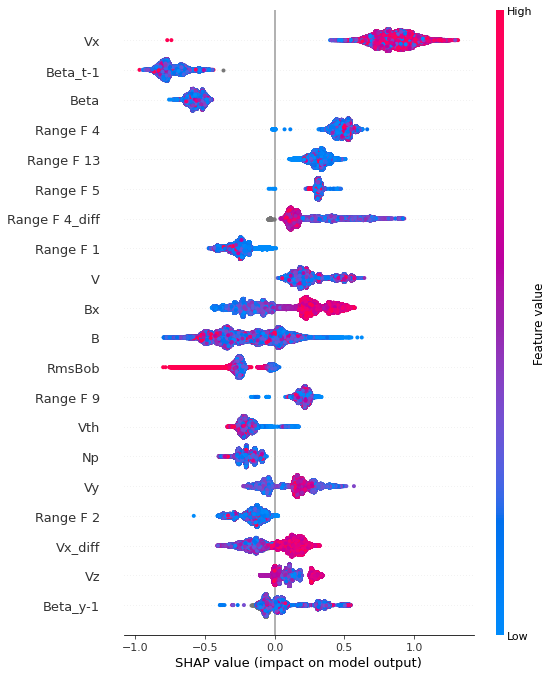

In [19]:
plot_shapley_values(classifier)

- Beta_t-1
- Range F4_diff
- Vx_diff
- Beta_y-1

In [24]:
df['Range F 13_diff'] = df['Range F 13'].diff(periods=144)
df['Range F 5_diff'] = df['Range F 5'].diff(periods=144)
df['V_diff'] = df['V'].diff(periods=144)
df['Range F 1_diff'] = df['Range F 1'].diff(periods=144)

data_test['Range F 13_diff'] = data_test['Range F 13'].diff(periods=144)
data_test['Range F 5_diff'] = data_test['Range F 5'].diff(periods=144)
data_test['V_diff'] = data_test['V'].diff(periods=144)
data_test['Range F 1_diff'] = data_test['Range F 1'].diff(periods=144)

In [25]:
df['Vx_diff'] = df['Vx'].diff(periods=144)
df['Range F 4_diff'] = df['Range F 4'].diff(periods=144)
df['Beta_y-1'] = df['Beta'].shift(144*365)
df['Beta_t-1'] = df['Beta'].shift(1)


data_test['Vx_diff'] = data_test['Vx'].diff(periods=144)
data_test['Range F 4_diff'] = data_test['Range F 4'].diff(periods=144)
data_test['Beta_y-1'] = data_test['Beta'].shift(144*365)
data_test['Beta_t-1'] = data_test['Beta'].shift(1)

In [26]:
df['Vx_d-1'] = df['Vx'].shift(144)
df['Vx_y-1'] = df['Vx'].shift(144*365)
df['Vx_m-1'] = df['Vx'].shift(144*30)
df['Vx_t-1'] = df['Vx'].shift(1)

data_test['Vx_d-1'] = data_test['Vx'].shift(144)
data_test['Vx_y-1'] = data_test['Vx'].shift(144*365)
data_test['Vx_m-1'] = data_test['Vx'].shift(144*30)
data_test['Vx_t-1'] = data_test['Vx'].shift(1)

In [27]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
df = df.fillna(0)
y = df['target']
X = df.drop(columns=['target'], axis=1)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    #model.set_params(class_weight='balanced')
    classifier = HistGradientBoostingClassifier()
    model = make_pipeline(StandardScaler(), classifier)


    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8804194322835758
0.347861273410481
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     71206
           1       0.79      0.36      0.49     13766

    accuracy                           0.88     84972
   macro avg       0.84      0.67      0.71     84972
weighted avg       0.87      0.88      0.86     84972

The balanced accuracy of the default model is 0.670
0.8626488725697877
0.3477614046742759
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     69883
           1       0.69      0.41      0.51     15089

    accuracy                           0.86     84972
   macro avg       0.79      0.68      0.72     84972
weighted avg       0.85      0.86      0.85     84972

The balanced accuracy of the default model is 0.683
0.9287765381537447
0.18535957510586015
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1       

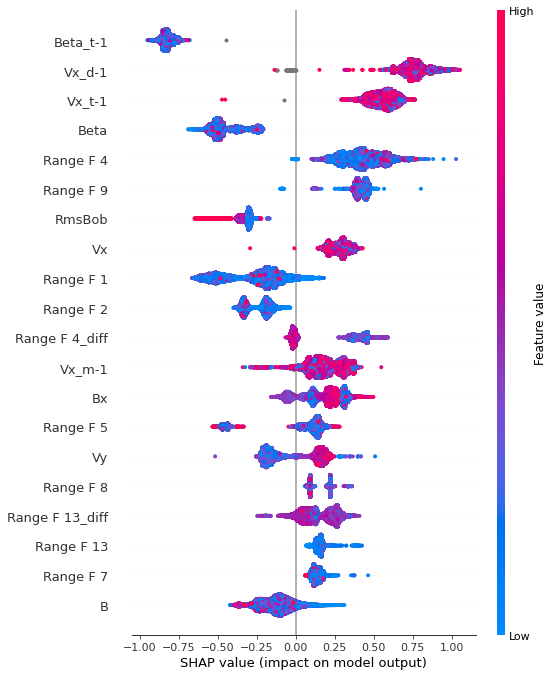

In [28]:
plot_shapley_values(classifier)

In [34]:
import seaborn as sns

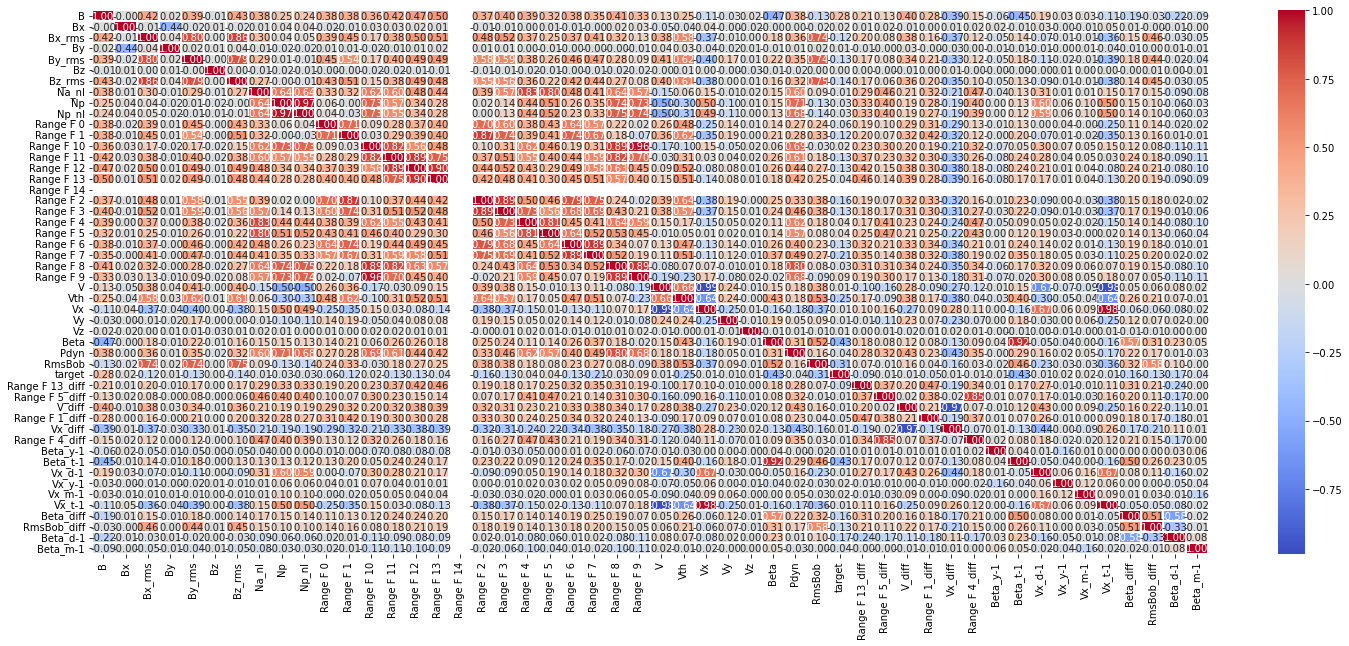

In [37]:
# Let's also draw a heatmap visualization of the correlation matrix
corr_matrix = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(25,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [50]:
df[corr_matrix['target'].loc[abs(corr_matrix['target'])>=0.05].index].shape

(509834, 23)

In [65]:
corr_matrix['target'].loc[abs(corr_matrix['target'])>=0.05].index

Index(['B', 'Bx_rms', 'By_rms', 'Bz_rms', 'Range F 0', 'Range F 1',
       'Range F 11', 'Range F 12', 'Range F 2', 'Range F 3', 'Range F 6',
       'Range F 7', 'Range F 9', 'Vth', 'Beta', 'RmsBob', 'target',
       'Range F 13_diff', 'Range F 1_diff', 'Beta_t-1', 'Beta_diff',
       'RmsBob_diff', 'Beta_d-1'],
      dtype='object')

In [51]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
new_df = df[corr_matrix['target'].loc[abs(corr_matrix['target'])>=0.05].index].fillna(0)
y = new_df['target']
X = new_df.drop(columns=['target'], axis=1)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    #model.set_params(class_weight='balanced')
    classifier = HistGradientBoostingClassifier()
    model = make_pipeline(StandardScaler(), classifier)


    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8870098385350469
0.27829755084101976
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     71206
           1       0.71      0.52      0.60     13766

    accuracy                           0.89     84972
   macro avg       0.81      0.74      0.77     84972
weighted avg       0.88      0.89      0.88     84972

The balanced accuracy of the default model is 0.738
0.8657087040436849
0.3312849006312396
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     69883
           1       0.69      0.45      0.54     15089

    accuracy                           0.87     84972
   macro avg       0.79      0.70      0.73     84972
weighted avg       0.85      0.87      0.85     84972

The balanced accuracy of the default model is 0.703
0.9282704891022925
0.18289953556080688
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1     

In [60]:
df['hour'] = df.index.hour
df['day_of_year'] = df.index.day_of_year
df['month'] = df.index.month
df['year'] = df.index.year

In [62]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
new_df = df#[corr_matrix['target'].loc[abs(corr_matrix['target'])>=0.05].index].fillna(0)
new_df['hour'] = new_df.index.hour
new_df['day_of_year'] = new_df.index.day_of_year
new_df['month'] = new_df.index.month
new_df['year'] = new_df.index.year
y = new_df['target']
X = new_df.drop(columns=['target'], axis=1)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    #model.set_params(class_weight='balanced')
    classifier = HistGradientBoostingClassifier()
    model = make_pipeline(StandardScaler(), classifier)


    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8748175869698254
0.3689466225423177
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     71206
           1       0.82      0.29      0.43     13766

    accuracy                           0.87     84972
   macro avg       0.85      0.64      0.68     84972
weighted avg       0.87      0.87      0.85     84972

The balanced accuracy of the default model is 0.640
0.8545638563291437
0.364178264644065
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     69883
           1       0.66      0.38      0.48     15089

    accuracy                           0.85     84972
   macro avg       0.77      0.67      0.70     84972
weighted avg       0.84      0.85      0.84     84972

The balanced accuracy of the default model is 0.668
0.9274466883208586
0.18718944087775402
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1       

#### Creation de time features

In [129]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
 
class Classifier(BaseEstimator):
    def __init__(self):
        self.model = HistGradientBoostingClassifier()
 
    def fit(self, X, y):
        self.model.fit(X, y)
 
    def predict(self, X):
        y_pred = self.model.predict(X)#_proba(X)
        return y_pred
    
    def feature_importances_(self):
        importance = self.model.feature_importances_
        return importance
 
 
def compute_rolling_std(X_df, feature, time_window, center=False):
    """
    For a given dataframe, compute the standard deviation over
    a defined period of time (time_window) of a defined feature
 
    Parameters
    ----------
    X : dataframe
    feature : str
        feature in the dataframe we wish to compute the rolling std from
    time_window : str
        string that defines the length of the time window passed to `rolling`
    center : bool
        boolean to indicate if the point of the dataframe considered is
        center or end of the window
    """
    name = "_".join([feature, time_window, "std"])
    X_df[name] = X_df[feature].rolling(time_window, center=center).std()
    X_df[name] = X_df[name].ffill().bfill()
    X_df[name] = X_df[name].astype(X_df[feature].dtype)
    return X_df
 
 
class FeatureExtractor(BaseEstimator):
    def fit(self, X, y):
        return self
 
    def transform(self, X):
        return compute_rolling_std(X, "Beta", "2h")
 
 
def get_estimator():
 
    feature_extractor = FeatureExtractor()
 
    classifier = Classifier()
    
    pipe = make_pipeline(feature_extractor, StandardScaler(), classifier)
    return pipe

In [11]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    #model.set_params(class_weight='balanced')
    classifier = HistGradientBoostingClassifier()
    model = make_pipeline(StandardScaler(), classifier)


    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8862919549969401
0.28903329273540107
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     71206
           1       0.70      0.53      0.60     13766

    accuracy                           0.89     84972
   macro avg       0.81      0.74      0.77     84972
weighted avg       0.88      0.89      0.88     84972

The balanced accuracy of the default model is 0.741
0.861519088640964
0.34447428978214445
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     69883
           1       0.67      0.44      0.53     15089

    accuracy                           0.86     84972
   macro avg       0.78      0.70      0.72     84972
weighted avg       0.85      0.86      0.85     84972

The balanced accuracy of the default model is 0.695
0.9308125029421457
0.1870985885550126
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1      

In [ ]:
df

In [17]:
import shap

In [18]:
def plot_shapley_values(model):
    '''
    Plot the shapley graph of the given model.
    ##########################################################################
    WARNING : Do not use it on random forest as it takes a huge amout of time.
    ##########################################################################
    Input:
    model (MODEL_TYPE) : Model for which to explain the predictions

    Output:
    None
    '''
    try:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(data_test)
        shap.summary_plot(shap_values, data_test)
    except (InvalidModelError, TypeError) as error:
        explainer = shap.Explainer(model, data_test)
        shap_values = explainer.shap_values(data_test)
        shap.summary_plot(shap_values, data_test)

In [23]:
plot_shapley_values(classifier)

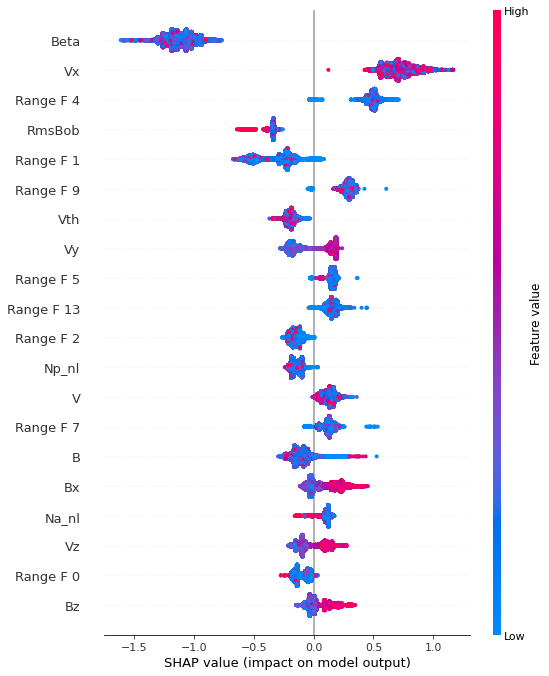

In [13]:
plot_shapley_values(classifier)

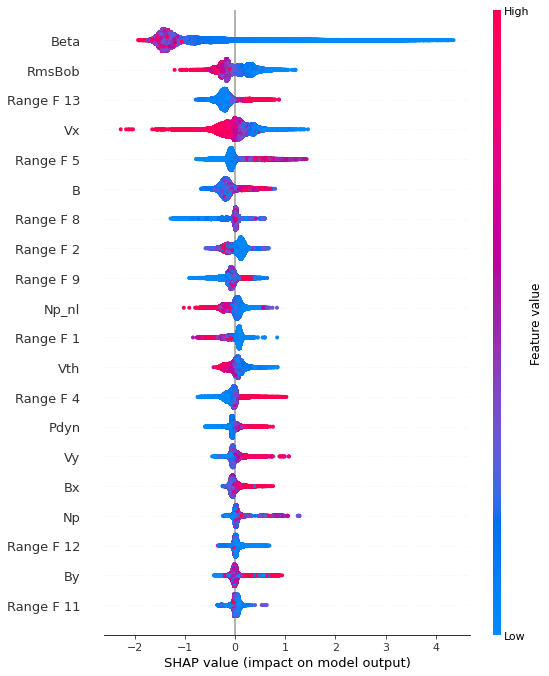

In [10]:
plot_shapley_values(model)

In [14]:
df.var(axis=0)


B             4.340452e+01
Bx            2.587383e+01
Bx_rms        1.562872e-01
By            2.573615e+01
By_rms        1.776249e-01
Bz            3.241280e+01
Bz_rms        2.320755e-01
Na_nl         9.851103e-02
Np            1.393941e+06
Np_nl         2.106844e+03
Range F 0     3.148059e+15
Range F 1     2.630276e+15
Range F 10    1.690759e+18
Range F 11    1.279020e+17
Range F 12    1.169893e+16
Range F 13    2.854609e+15
Range F 14    0.000000e+00
Range F 2     4.135894e+15
Range F 3     1.212434e+16
Range F 4     3.112080e+16
Range F 5     5.597724e+16
Range F 6     1.824948e+17
Range F 7     4.538633e+17
Range F 8     1.916268e+18
Range F 9     6.210248e+18
V             1.421458e+04
Vth           4.204435e+02
Vx            1.227993e+04
Vy            2.403428e+03
Vz            1.567957e+03
Beta          3.988532e+02
Pdyn          3.283616e-29
RmsBob        9.329836e-03
target        1.016756e-01
dtype: float64

In [18]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.04)
selector.fit_transform(df)
selector.get_support()



array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True])

In [16]:
np.array(df.columns)[selector.get_support()]


array(['B', 'Bx', 'Bx_rms', 'By', 'By_rms', 'Bz', 'Bz_rms', 'Na_nl', 'Np',
       'Np_nl', 'Range F 0', 'Range F 1', 'Range F 10', 'Range F 11',
       'Range F 12', 'Range F 13', 'Range F 2', 'Range F 3', 'Range F 4',
       'Range F 5', 'Range F 6', 'Range F 7', 'Range F 8', 'Range F 9',
       'V', 'Vth', 'Vx', 'Vy', 'Vz', 'Beta', 'Pdyn', 'RmsBob', 'target'],
      dtype=object)

In [27]:
X.columns

Index(['B', 'Bx', 'Bx_rms', 'By', 'By_rms', 'Bz', 'Bz_rms', 'Na_nl', 'Np',
       'Np_nl', 'Range F 0', 'Range F 1', 'Range F 10', 'Range F 11',
       'Range F 12', 'Range F 13', 'Range F 2', 'Range F 3', 'Range F 4',
       'Range F 5', 'Range F 6', 'Range F 7', 'Range F 8', 'Range F 9', 'V',
       'Vth', 'Vx', 'Vy', 'Vz', 'Beta'],
      dtype='object')

In [28]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
X = X.drop(['Range F 10','Range F 11','Range F 12','Range F 3','Range F 6','Range F 8','Bx_rms', 'By', 'By_rms', 'Bz_rms','Np'],axis=1)
# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    #model.set_params(class_weight='balanced')
    classifier = HistGradientBoostingClassifier()
    model = make_pipeline(StandardScaler(), classifier)


    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8823494798286494
0.2961609334148265
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     71206
           1       0.68      0.52      0.59     13766

    accuracy                           0.88     84972
   macro avg       0.79      0.74      0.76     84972
weighted avg       0.87      0.88      0.88     84972

The balanced accuracy of the default model is 0.737
0.8592477522007249
0.3516535339730965
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     69883
           1       0.67      0.41      0.51     15089

    accuracy                           0.86     84972
   macro avg       0.78      0.68      0.71     84972
weighted avg       0.84      0.86      0.85     84972

The balanced accuracy of the default model is 0.684
0.9282587205197006
0.1918286987698351
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1       

In [52]:
# Initialise la colonne 'mean_time' avec des zéros
df['mean_time'] = 0

# Réinitialiser les valeurs de la colonne 'mean_time' lorsque y change de valeur
df['mean_time'] = df['mean_time'].where(df.target != df.target.shift(), 0)

# Incrémenter les valeurs de la colonne 'mean_time' pour les lignes où y est égal à 1
df['mean_time'] += df.target.eq(1).cumsum()

In [47]:
# Créer une série booléenne pour indiquer les lignes où y == 1
y_eq_1 = df.target == 1

# Créer une série booléenne pour indiquer les lignes où y a changé de valeur
y_change = df.target != df.target.shift(1)

# Affecter un compteur à toutes les lignes où y == 1
df['mean_time'] = y_eq_1.cumsum()

# Réinitialiser le compteur lorsque y change de valeur
df['mean_time'] = df['mean_time'].where(~y_change, 0)

In [100]:
df.iloc[np.argmax(df['mean_time'])]['target']

0.0

In [63]:
df.iloc[0]['target']

0.0

In [58]:
df['target_shift'] = df.target.shift(1)

In [64]:
from tqdm import tqdm

In [79]:
df['mean_time'].iloc[0] = count

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [80]:
df['mean_time'].iloc[0]

797

In [73]:
df.iloc[0]['mean_time'] = count

/var/folders/f0/q7nn178n5cldx0lvl6yvbbn40000gn/T/ipykernel_30101/163794007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[0]['mean_time'] = count


In [96]:
df['mean_time1'] = 0

# Créer une série booléenne pour indiquer les lignes où target == target.shift(1)
target_eq_prev = df.target == df.target.shift(1)

# Affecter un compteur à toutes les lignes où target == target.shift(1)
df['mean_time1'] = target_eq_prev.cumsum()

# Réinitialiser le compteur lorsque target change de valeur
df.loc[~target_eq_prev, 'mean_time1'] = 1
df.iloc[0, df.columns.get_loc('mean_time1')] = 1 

In [98]:
a = df['mean_time1'] == df['mean_time']
a.value_counts()

False    509053
True        781
dtype: int64

In [99]:
df.loc[df['target'] == 1][251:].head(51)


,B,Bx,Bx_rms,By,By_rms,Bz,Bz_rms,Na_nl,Np,Np_nl,...,Vx,Vy,Vz,Beta,Pdyn,RmsBob,target,target_shift,mean_time,mean_time1
1997-10-03 07:30:00,6.526663,4.885219,0.095676,4.161507,0.134931,-1.048951,0.232795,0.530929,8.994350,8.726773,...,-428.670654,16.355263,-1.726739,0.183930,2.767881e-15,0.044773,1,1.0,252,332
1997-10-03 07:40:00,6.643271,4.677466,0.083828,4.691644,0.099823,-0.241475,0.160475,0.377422,8.344487,8.248194,...,-429.927490,18.283831,1.507791,0.133790,2.584279e-15,0.031546,1,1.0,253,333
1997-10-03 07:50:00,6.407836,5.028172,0.183462,3.909313,0.235188,0.065433,0.252963,0.422080,8.740066,8.533539,...,-427.219788,15.122730,0.158792,0.174649,2.672015e-15,0.061263,1,1.0,254,334
1997-10-03 08:00:00,4.752720,2.438957,0.411670,0.351278,0.484523,-0.384232,0.332820,0.526008,12.570650,12.800595,...,-427.984009,13.870817,1.120030,0.791512,3.859100e-15,0.191906,1,1.0,255,335
1997-10-10 22:00:00,13.539953,-5.068705,0.425798,9.033350,0.450501,-8.665301,0.432567,0.374286,15.519519,14.188791,...,-438.667603,-22.542934,-3.887166,0.067587,5.009290e-15,0.056965,1,0.0,1,1
1997-10-10 22:10:00,13.773942,-4.165741,0.286146,10.317901,0.294113,-8.059195,0.360785,0.245713,13.739303,13.222610,...,-437.158661,-28.932774,-9.168011,0.048312,4.413874e-15,0.040553,1,1.0,2,1426
1997-10-10 22:20:00,13.918042,-4.318245,0.210863,9.885862,0.236746,-8.757591,0.223168,0.234723,12.401976,11.621686,...,-436.867004,-26.583878,-7.009129,0.043100,3.976588e-15,0.028422,1,1.0,3,1427
1997-10-10 22:30:00,13.828774,-5.608177,0.309021,8.922510,0.479889,-8.829035,0.362474,0.247607,13.203436,13.530579,...,-427.078918,-19.999487,-0.872076,0.039163,4.039896e-15,0.049809,1,1.0,4,1428
1997-10-10 22:40:00,13.894550,-6.503958,0.293194,7.944407,0.530560,-9.296367,0.382579,0.330216,14.105268,14.186405,...,-424.227142,-14.491308,2.403002,0.047460,4.252374e-15,0.053101,1,1.0,5,1429
1997-10-10 22:50:00,13.768789,-5.100237,0.452138,6.866696,0.607134,-10.597176,0.553970,0.417263,14.060195,13.637349,...,-431.003815,-16.721254,2.983157,0.050272,4.382364e-15,0.069703,1,1.0,6,1430


In [87]:
df['mean_time

1997-10-01 00:00:00     1
1997-10-01 00:10:00     2
1997-10-01 00:20:00     3
1997-10-01 00:30:00     4
1997-10-01 00:40:00     5
1997-10-01 00:50:00     6
1997-10-01 01:00:00     7
1997-10-01 01:10:00     8
1997-10-01 01:20:00     9
1997-10-01 01:30:00    10
1997-10-01 01:40:00    11
1997-10-01 01:50:00    12
1997-10-01 02:00:00    13
1997-10-01 02:10:00    14
1997-10-01 02:20:00    15
1997-10-01 02:30:00    16
1997-10-01 02:40:00    17
1997-10-01 02:50:00    18
1997-10-01 03:00:00    19
1997-10-01 03:10:00    20
1997-10-01 03:20:00    21
1997-10-01 03:30:00    22
1997-10-01 03:40:00    23
1997-10-01 03:50:00    24
1997-10-01 04:00:00    25
1997-10-01 04:10:00    26
1997-10-01 04:20:00    27
1997-10-01 04:30:00    28
1997-10-01 04:40:00    29
1997-10-01 04:50:00    30
1997-10-01 05:00:00    31
1997-10-01 05:10:00    32
1997-10-01 05:20:00    33
1997-10-01 05:30:00    34
1997-10-01 05:40:00    35
1997-10-01 05:50:00    36
1997-10-01 06:00:00    37
1997-10-01 06:10:00    38
1997-10-01 0

In [43]:
df['mean_time'] = df.apply(lambda x: x['target']==1 and x['target_shift']==x['target'], axis=1).cumsum()

In [85]:
df

,B,Bx,Bx_rms,By,By_rms,Bz,Bz_rms,Na_nl,Np,Np_nl,...,Vth,Vx,Vy,Vz,Beta,Pdyn,RmsBob,target,target_shift,mean_time
1997-10-01 00:00:00,6.584763,3.753262,2.303108,0.966140,2.602693,-5.179685,2.668414,2.290824,23.045732,24.352797,...,80.613098,-351.598389,-138.521454,6.956387,7.641340,5.487331e-15,0.668473,0,NaN,1
1997-10-01 00:10:00,6.036456,0.693559,1.810752,-0.904843,2.165570,-1.944006,2.372931,2.119593,23.000492,20.993362,...,69.919327,-331.012146,-110.970787,-21.269474,9.149856,4.783776e-15,0.753848,0,0.0,2
1997-10-01 00:20:00,5.653682,-4.684786,0.893058,-2.668830,0.768677,1.479302,1.069266,2.876815,20.676191,17.496399,...,92.194435,-306.114899,-117.035202,-13.018987,11.924199,3.719768e-15,0.282667,0,0.0,3
1997-10-01 00:30:00,5.461768,-4.672382,1.081638,-2.425630,0.765681,1.203713,0.934445,2.851195,20.730188,16.747108,...,94.230705,-298.460938,-110.403969,-20.350492,16.032987,3.525211e-15,0.304713,0,0.0,4
1997-10-01 00:40:00,6.177846,-5.230110,1.046126,-2.872561,0.635256,1.505010,0.850657,3.317076,20.675701,17.524536,...,89.292595,-307.303070,-111.865845,-12.313167,10.253789,3.694283e-15,0.244203,0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-31 23:10:00,3.965134,-2.384035,0.441219,2.217838,0.487077,-1.381152,0.631304,0.109651,6.902308,6.687846,...,37.452972,-349.390076,-0.107922,-4.417354,1.304273,1.411728e-15,0.247082,0,0.0,793
2007-12-31 23:20:00,4.355162,-3.164303,0.282613,-0.074648,0.437347,-2.482400,0.216370,0.109274,6.674006,6.294575,...,36.232159,-345.545410,9.316546,0.370024,0.982693,1.335080e-15,0.139195,0,0.0,794
2007-12-31 23:30:00,4.268256,-3.642998,0.205906,0.114703,0.418586,-1.986862,0.191687,0.110750,6.519631,5.415397,...,36.020718,-342.284668,8.631990,3.142477,0.989657,1.278599e-15,0.124656,0,0.0,795
2007-12-31 23:40:00,4.194678,-3.701024,0.137178,0.903285,0.256621,-1.420870,0.148968,0.117862,6.421871,5.499616,...,35.154537,-343.367157,5.641228,-2.413303,0.958408,1.267188e-15,0.080642,0,0.0,796


In [10]:
df.shape

(509834, 34)

In [31]:
df.groupby('target')

In [34]:
df.target.shift(1)

1997-10-01 00:00:00    NaN
1997-10-01 00:10:00    0.0
1997-10-01 00:20:00    0.0
1997-10-01 00:30:00    0.0
1997-10-01 00:40:00    0.0
                      ... 
2007-12-31 23:10:00    0.0
2007-12-31 23:20:00    0.0
2007-12-31 23:30:00    0.0
2007-12-31 23:40:00    0.0
2007-12-31 23:50:00    0.0
Name: target, Length: 509834, dtype: float64

In [37]:
# Décaler les valeurs de la colonne y d'une ligne vers le haut
df['targetbis'] = df.target.shift(1)

# Ajouter la colonne 'mean_time'
df['mean_time'] = df.apply(lambda x: x['target']==1 and x['target']==x['targetbis'], axis=1)

# Calculer la somme cumulée de 'mean_time' pour chaque ligne
df['mean_time'] = df.mean_time.cumsum()

# Mettre à zéro les valeurs de 'mean_time' où y = 0
df.loc[df['target'] == 0, 'mean_time'] = 0

# remplir les valeurs de 'mean_time' pour les lignes consécutives où y = 1
df['mean_time'] = df.mean_time.where(df.target == 1).ffill()

In [ ]:
df

In [27]:
# Ajouter la colonne 'mean_time'
df['mean_time'] = df.groupby('target').cumcount() + 1

# Mettre à zéro les valeurs de 'mean_time' où y = 0
df.loc[df['target'] == 0, 'mean_time'] = 0

# Calculer la somme cumulée de 'mean_time' pour chaque groupe y
#df['mean_time'] = df.groupby('target').mean_time.cumsum()

In [38]:
df['mean_time'].value_counts()

57951.0    11410
57323.0     9226
55072.0     9193
55209.0     8650
58005.0     8537
           ...  
1977.0         1
7377.0         1
47979.0        1
22639.0        1
57889.0        1
Name: mean_time, Length: 58176, dtype: int64

In [95]:
np.max(df.mean_time)

11408